In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline

In [2]:
#load the data
df = pd.read_csv('/content/data.csv')

In [3]:
df.head()

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [4]:
#scaling the features values
scaler = StandardScaler()
scaler.fit(df.drop('result',axis=1))
scaled_feat = scaler.transform(df.drop('result',axis=1))
scaled_df = pd.DataFrame(scaled_feat,columns = df.columns[:-1])
scaled_df.head()

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos
0,-1.730045,0.698221,-1.15245,0.207592,1.101492,2.120570,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,2.971339
1,-1.726031,0.621646,-1.15245,-1.170499,0.437943,-0.471571,2.877424,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230
2,-1.722017,1.540540,-1.15245,0.207592,-0.225607,-0.471571,2.877424,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,5.092319
3,-1.718003,1.004519,-1.15245,-1.170499,0.703363,2.120570,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230
4,-1.713989,1.004519,-1.15245,0.207592,0.570653,-0.471571,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230


In [5]:
#split the data into train, and test
x_train, x_test, y_train, y_test = train_test_split(scaled_df , df['result'], test_size=0.2)

In [6]:
#train the model and perform balance between the 2 classes
model = LogisticRegression(class_weight='balanced')
model.fit(x_train,y_train)

LogisticRegression(class_weight='balanced')

In [7]:
#perform the prediction on the train data and print the confusion matrix
y_predict = model.predict(x_train)
conf_matrix = confusion_matrix(y_train,y_predict)
print(conf_matrix)

[[548  52]
 [  4  86]]


In [8]:
#print the metrics for train step
report = print(classification_report(y_train,y_predict))
print(report)

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       600
           1       0.62      0.96      0.75        90

    accuracy                           0.92       690
   macro avg       0.81      0.93      0.85       690
weighted avg       0.94      0.92      0.93       690

None


In [9]:
#perform the prediction on the test data
prediction = model.predict(x_test)

In [10]:
#print the confusion matrix for the model in test process
conf_matrix = confusion_matrix(y_test,prediction)
print(conf_matrix)

[[140  15]
 [  1  17]]


In [11]:
#print the metrics for the model in the test process
report = print(classification_report(y_test,prediction))
print(report)

              precision    recall  f1-score   support

           0       0.99      0.90      0.95       155
           1       0.53      0.94      0.68        18

    accuracy                           0.91       173
   macro avg       0.76      0.92      0.81       173
weighted avg       0.94      0.91      0.92       173

None


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<Figure size 576x360 with 0 Axes>

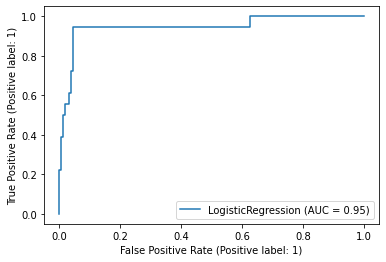

In [12]:
#plot ROC curve
plt.figure(figsize=(8,5))
metrics.plot_roc_curve(model, x_test, y_test)
plt.show()